## TADA STOCK PRICE PREDICTION USING LSTM

### 1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

from sklearn.preprocessing import MinMaxScaler

### 2. Importing the training data set

In [17]:
data_df = pd.read_csv('dataset/NSE-Tata-Global-Beverages-Limited.csv')
data_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


### 3. Analyze the opening prices from the training data set

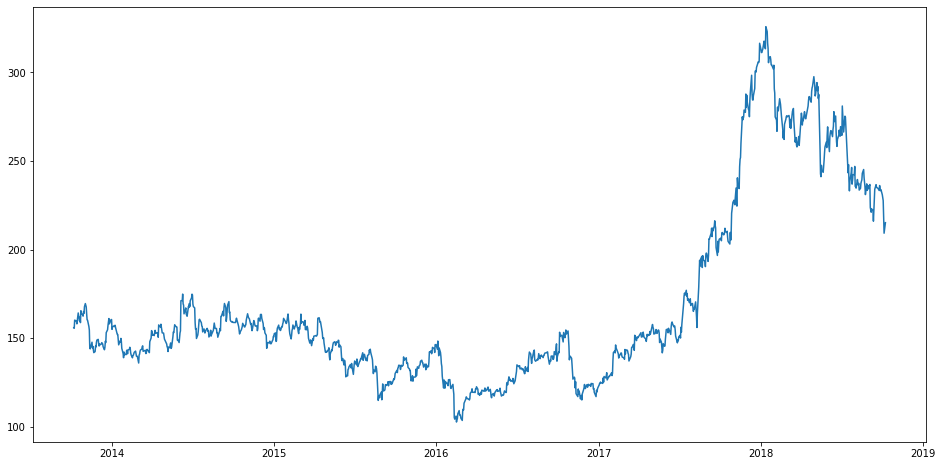

In [19]:
data_df['Date'] = pd.to_datetime(data_df.Date, format='%Y-%m-%')
data_df.index = data_df['Date']

plt.figure(figsize=(16,8))
plt.plot(data_df['Close'], label='Close price history')

data_df = data_df.sort_index(ascending=True, axis=0)

### 4. Sort the dataset on date time and filter "Date" and "Close" columns

In [20]:
train_data = data_df.iloc[0:987, [5]]
train_data.head()

,Close
Date,
2013-10-08,155.80
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45


### 5. Normalize the new filtered data set

In [21]:
train_data_value = train_data.values

scaler = MinMaxScaler(feature_range=(0,1))
train_data_scaled = scaler.fit_transform(train_data_value)

### 6. Create a data structure with 60 timesteps and 1 output

In [22]:
x_train_data, y_train_data = [], []

for i in range(60, len(train_data_scaled)):
    x_train_data.append(train_data_scaled[i-60:i, 0])
    y_train_data.append(train_data_scaled[i, 0])

### 7. Data reshaping

In [23]:
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

### 8. Create the LSTM model

In [24]:
regressor = Sequential()

In [25]:
# 1st layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

# 2nd, 3rd, 4th layer
for i in range(0, 3):
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(rate = 0.2))

# 5th layer
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate = 0.2))

In [26]:
regressor.add(Dense(units=1))

In [27]:
regressor_large_time_scale = Sequential()

# 1st layer
regressor_large_time_scale.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
regressor_large_time_scale.add(Dropout(rate = 0.2))

# 2nd, 3rd, 4th layer
for i in range(0, 3):
    regressor_large_time_scale.add(LSTM(units=50, return_sequences=True))
    regressor_large_time_scale.add(Dropout(rate = 0.2))

# 5th layer
regressor_large_time_scale.add(LSTM(units=50, return_sequences=False))
regressor_large_time_scale.add(Dropout(rate = 0.2))

regressor_large_time_scale.add(Dense(units=1))

### 9. Compile the LSTM model

In [28]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
regressor_large_time_scale.compile(optimizer='adam', loss='mean_squared_error')

### 10. Fit the LSTM model to the training set

In [30]:
regressor.fit(x_train_data, y_train_data, epochs=100, batch_size=32)
regressor.save('models/tada_stock_close_price_prediction_lstm.h5')

Epoch 1/100
29/29 [==============================] - 9s 76ms/step - loss: 0.0312
Epoch 2/100
29/29 [==============================] - 2s 74ms/step - loss: 0.0102
Epoch 3/100
29/29 [==============================] - 2s 73ms/step - loss: 0.0112
Epoch 4/100
29/29 [==============================] - 2s 75ms/step - loss: 0.0100
Epoch 5/100
29/29 [==============================] - 2s 75ms/step - loss: 0.0079
Epoch 6/100
29/29 [==============================] - 2s 76ms/step - loss: 0.0068
Epoch 7/100
29/29 [==============================] - 2s 76ms/step - loss: 0.0065
Epoch 8/100
29/29 [==============================] - 2s 75ms/step - loss: 0.0068
Epoch 9/100
29/29 [==============================] - 2s 76ms/step - loss: 0.0065
Epoch 10/100
29/29 [==============================] - 2s 76ms/step - loss: 0.0064
Epoch 11/100
29/29 [==============================] - 2s 76ms/step - loss: 0.0069
Epoch 12/100
29/29 [==============================] - 2s 77ms/step - loss: 0.0064
Epoch 13/100
29/29 [=====

In [31]:
regressor_large_time_scale.fit(x_train_data, y_train_data, epochs=150, batch_size=8)
regressor_large_time_scale.save('models/tada_stock_price_prediction_lstm_large_time_scale.h5')

Epoch 1/150
116/116 [==============================] - 15s 67ms/step - loss: 0.0172
Epoch 2/150
116/116 [==============================] - 8s 67ms/step - loss: 0.0086
Epoch 3/150
116/116 [==============================] - 8s 68ms/step - loss: 0.0072
Epoch 4/150
116/116 [==============================] - 8s 67ms/step - loss: 0.0057
Epoch 5/150
116/116 [==============================] - 8s 69ms/step - loss: 0.0057
Epoch 6/150
116/116 [==============================] - 8s 71ms/step - loss: 0.0058
Epoch 7/150
116/116 [==============================] - 8s 69ms/step - loss: 0.0047
Epoch 8/150
116/116 [==============================] - 9s 80ms/step - loss: 0.0042
Epoch 9/150
116/116 [==============================] - 8s 72ms/step - loss: 0.0037
Epoch 10/150
116/116 [==============================] - 8s 69ms/step - loss: 0.0038
Epoch 11/150
116/116 [==============================] - 8s 73ms/step - loss: 0.0033
Epoch 12/150
116/116 [==============================] - 8s 72ms/step - loss: 0.0035


### 11. Data processing

In [36]:
test_data = data_df.iloc[987:, [5]]
test_data.head()

test_data_value = test_data.values

total_data = pd.concat((train_data['Close'], test_data['Close']), axis=0)

### 12. Prepare inputs for prediction


In [37]:
inputs = total_data[len(total_data) - len(test_data) - 60:].values

### 13. Normalize and create the data structure

In [39]:
inputs = inputs.reshape(-1,1)

inputs = scaler.transform(inputs)

x_test_data = []
for i in range(60, len(inputs)):
    x_test_data.append(inputs[i-60:i, 0])
#
x_test_data = np.array(x_test_data)
x_test_data = np.reshape(x_test_data, (x_test_data.shape[0], x_test_data.shape[1], 1))

### 14. Predict the stock price using the LSTM model

In [40]:
predicted_stock_price = regressor.predict(x_test_data)

8/8 [==============================] - 2s 31ms/step


In [41]:
predicted_stock_price_large_time_scale = regressor_large_time_scale.predict(x_test_data)

8/8 [==============================] - 2s 31ms/step


### 15. Invert the scaling of the predicted stock price

In [42]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [43]:
predicted_stock_price_large_time_scale = scaler.inverse_transform(predicted_stock_price_large_time_scale)

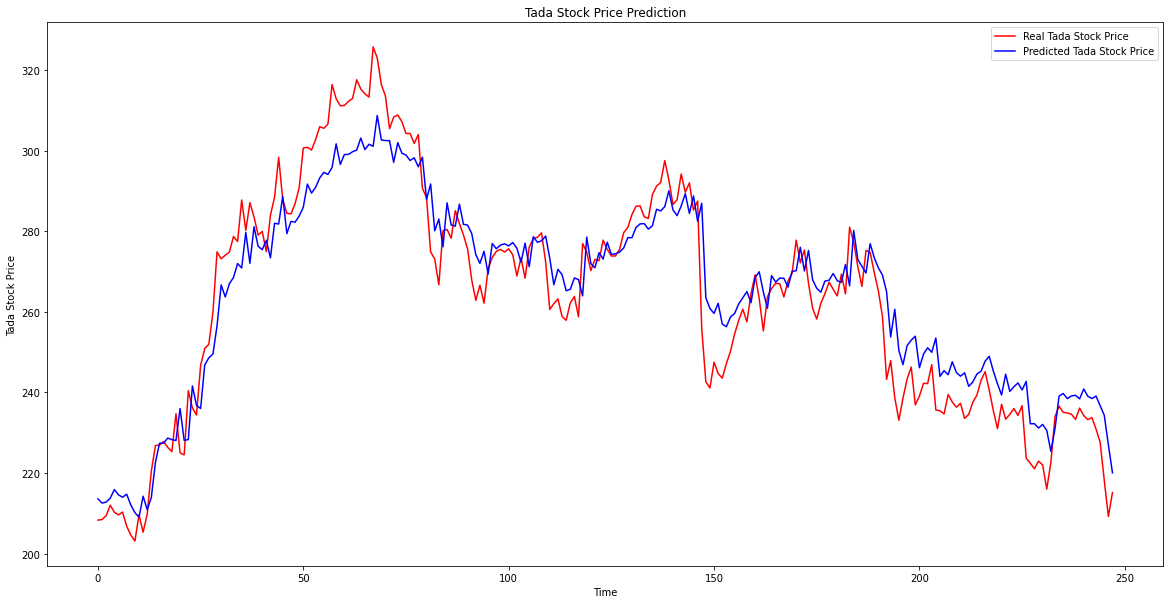

In [45]:
plt.plot(test_data_value, color='red', label='Real Tada Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Tada Stock Price')

plt.title('Tada Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tada Stock Price')

plt.legend()
plt.show()